In [1]:
# Fuente desde donde hemos sacado los datos
# https://zenodo.org/record/4252636
import pandas as pd
# Leemos el dataset
cochesUsados = pd.read_csv('cochesPracticaOriginal.csv')
cochesUsadosOriginal = cochesUsados.copy()

In [2]:
def cleanData(data):
    # Eliminamos columnas innecesarias
    data.drop(['Unnamed: 0','car_desc', 'image_url', 'ad_id','ad_type', 'ad_time', 'ts','car_door_num'], axis=1, inplace=True)
    # Eliminamos lineas incorrectas csv
    data= data[(data['ad_title'] != 'ad_title') & (data['car_year'].str.isnumeric())]
    # Eliminamos lineas con valores nulos
    data = data.dropna()
    return data
    
# Limpiamos dataset
cochesUsados = cleanData(cochesUsados)

In [3]:
# Guardamos los datos previamente limpiados en un nuevo fichero
pd.DataFrame.to_csv(cochesUsados,'cochesFinal.csv', index=False)

In [4]:
# Cargamos los datos limpiados y añadimos cabeceras
cochesUsados = pd.read_csv('cochesFinal.csv')

In [5]:
import string
import unicodedata

def splitBrand(carTitle):
    dataArray = carTitle.split('-')
    brand = dataArray[0:-1]
    brand = ' '.join(brand).strip()
    return brand

def splitModel(carTitle):
    dataArray = carTitle.split('-')
    model = dataArray[-1]
    return str(model).strip()

def clean_text(text):
    # caracteres permitidos en inglés
    valid_chars = string.ascii_letters + string.digits + " "
    
    # convierte las vocales con acentos a su forma sin acento
    clean_text = unicodedata.normalize("NFKD", text).encode("ASCII", "ignore").decode().upper()

    # elimina los caracteres que no están en valid_chars
    clean_text = "".join(c for c in clean_text if c in valid_chars)
    return clean_text

def removeTextAndGetInt(text,toBeRemoved):
    try:
        text.strip()
        return int(text.replace(toBeRemoved,''))
    except ValueError:
        return int(0)

def addExtraFieldsToDataset():
    cochesUsados['brand'] = cochesUsados.apply(lambda row : splitBrand(row['ad_title']), axis = 1)
    cochesUsados['model'] = cochesUsados.apply(lambda row : splitModel(row['ad_title']), axis = 1)
    cochesUsados['car_power'] = cochesUsados.apply(lambda row : removeTextAndGetInt(row['car_power'],'CV'), axis = 1)
    cochesUsados['car_km'] = cochesUsados.apply(lambda row : removeTextAndGetInt(row['car_km'],'kms'), axis = 1)
    
    cochesUsados['brand'] = cochesUsados.apply(lambda row : clean_text(row['brand']), axis = 1)
    cochesUsados['model'] = cochesUsados.apply(lambda row : clean_text(row['model']), axis = 1)
    cochesUsados['region'] = cochesUsados.apply(lambda row : clean_text(row['region']), axis = 1)
    cochesUsados['advertizer_type'] = cochesUsados.apply(lambda row : clean_text(row['advertizer_type']), axis = 1)
    cochesUsados['car_engine_type'] = cochesUsados.apply(lambda row : clean_text(row['car_engine_type']), axis = 1)
    
    #'brand','advertizer_type','model','region','car_engine_type'

addExtraFieldsToDataset()

In [6]:
# Mostramos el numero de filas y columnas de nuestro dataset
print('El numero de filas es:', cochesUsados.shape[0])
print('El numero de columnas es:', cochesUsados.shape[1])

El numero de filas es: 227898
El numero de columnas es: 10


In [7]:
# Eliminamos outliers
q_low =  cochesUsados['car_price'].quantile(0.1)
q_hi  =  cochesUsados['car_price'].quantile(0.90)
cochesUsados  = cochesUsados[(cochesUsados['car_price'] < q_hi) & (cochesUsados['car_price'] > q_low)]
# Mostramos el numero de filas y columnas de nuestro dataset
print('El numero de filas es:', cochesUsados.shape[0])
print('El numero de columnas es:', cochesUsados.shape[1])

El numero de filas es: 181650
El numero de columnas es: 10


In [8]:
# Visualizamos los 5 primeros registros
cochesUsados.head()

,ad_title,car_km,car_year,car_engine_type,car_power,car_price,advertizer_type,region,brand,model
0,CITROEN - C5 AIRCROSS,2,2020,MANUAL,131,19590,PROFESIONAL,ALAVA,CITROEN,C5 AIRCROSS
1,CITROEN - C5 AIRCROSS,2,2020,MANUAL,131,17490,PROFESIONAL,ALAVA,CITROEN,C5 AIRCROSS
2,CITROEN - JUMPY,0,2007,MANUAL,120,7300,PARTICULAR,ALAVA,CITROEN,JUMPY
4,MERCEDES-BENZ - CLASE E,0,2007,AUTOMATICO,195,8900,PARTICULAR,ALAVA,MERCEDES BENZ,CLASE E
5,CITROEN - C8,0,2007,MANUAL,0,7000,PROFESIONAL,ALAVA,CITROEN,C8


In [9]:
# Visualizamos los 5 ultimos registros
cochesUsados.tail()

,ad_title,car_km,car_year,car_engine_type,car_power,car_price,advertizer_type,region,brand,model
227893,BMW - SERIE 2 ACTIVE TOURER 216D,0,2016,AUTOMATICO,116,14813,PROFESIONAL,ZARAGOZA,BMW,SERIE 2 ACTIVE TOURER 216D
227894,PEUGEOT - 3008 1.5L BLUEHDI 96KW 130CV SS ACTIVE,0,2018,MANUAL,130,19772,PROFESIONAL,ZARAGOZA,PEUGEOT,3008 15L BLUEHDI 96KW 130CV SS ACTIVE
227895,SEAT - ALHAMBRA 2.0 TDI 140CV REFERENCE PLUS,0,2008,MANUAL,140,8900,PROFESIONAL,ZARAGOZA,SEAT,ALHAMBRA 20 TDI 140CV REFERENCE PLUS
227896,HONDA - CRV 2.0 IVTEC ELEGANCE,0,2015,MANUAL,155,18130,PROFESIONAL,ZARAGOZA,HONDA,CRV 20 IVTEC ELEGANCE
227897,VOLKSWAGEN - POLO 1.2 TSI 90CV DSG ADVANCE,0,2013,AUTOMATICO,90,10500,PROFESIONAL,ZARAGOZA,VOLKSWAGEN,POLO 12 TSI 90CV DSG ADVANCE


In [10]:
# Mostramos información sobre los tipos de datos que tenemos en nuestro dataset
cochesUsados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181650 entries, 0 to 227897
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ad_title         181650 non-null  object
 1   car_km           181650 non-null  int64 
 2   car_year         181650 non-null  int64 
 3   car_engine_type  181650 non-null  object
 4   car_power        181650 non-null  int64 
 5   car_price        181650 non-null  int64 
 6   advertizer_type  181650 non-null  object
 7   region           181650 non-null  object
 8   brand            181650 non-null  object
 9   model            181650 non-null  object
dtypes: int64(4), object(6)
memory usage: 15.2+ MB


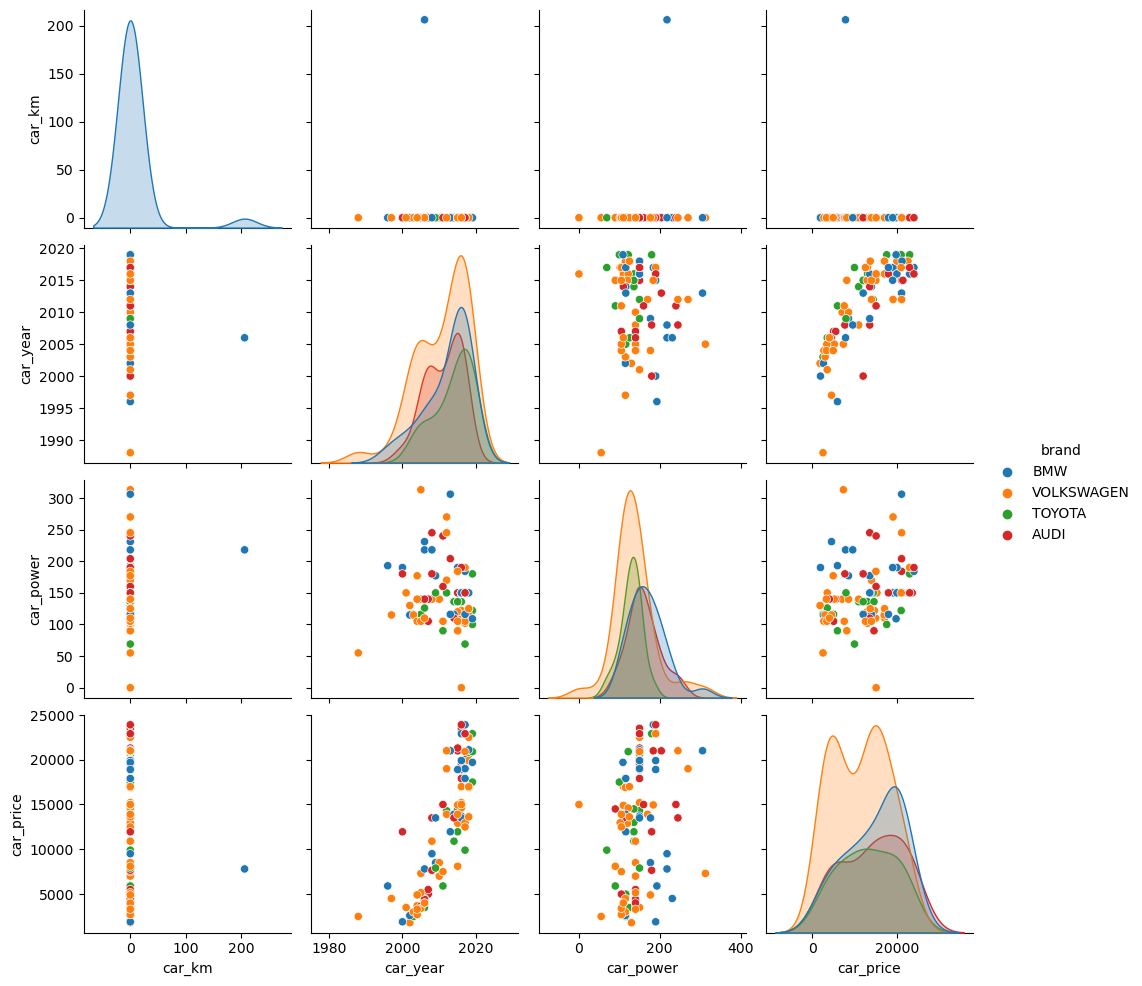

In [11]:
import seaborn as sb
sb.pairplot(cochesUsados[cochesUsados['brand'].isin(['AUDI', 'BMW','TOYOTA','VOLKSWAGEN'])][0:100], hue="brand", x_vars=[
            'car_km', 'car_year', 'car_power', 'car_price'], y_vars=['car_km', 'car_year', 'car_power', 'car_price'])


In [12]:
sb.heatmap(cochesUsados.corr(),annot=True)

<AxesSubplot:>

In [13]:
import matplotlib.pyplot as plt
#Mostramos el top de modelos con el mayor numero de coincidencias
cochesUsados['model'].value_counts().iloc[:5].plot(kind="bar")

<AxesSubplot:>

In [14]:
grouped = cochesUsados[cochesUsados['brand'].isin(['AUDI', 'BMW','TOYOTA','VOLKSWAGEN','MERCEDES-BENZ','FORD','OPEL'])].groupby(['brand']).mean()
grouped = grouped.reset_index()

sb.barplot(data=grouped,x='brand',y='car_price')

<AxesSubplot:xlabel='brand', ylabel='car_price'>

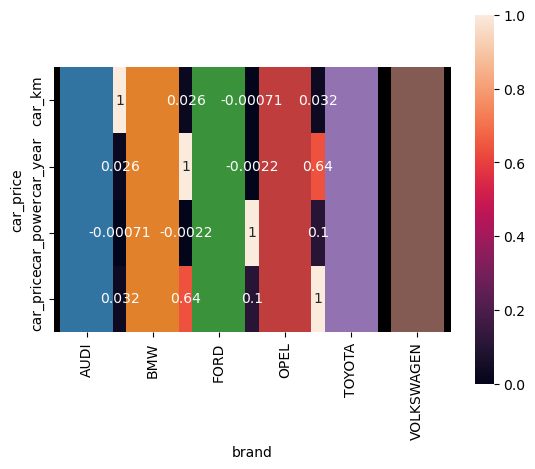

In [15]:
from wordcloud import WordCloud,STOPWORDS

res = " ".join(cochesUsados['brand'])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000,height=2500).generate(res)

import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.show()

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
le = preprocessing.LabelEncoder()
scaler = StandardScaler()


#Labels encoders (brand, model, region, advertizer_type, car_engine_type)
def generateLabelEncoder(data):
    global le
    for key in ['brand','advertizer_type','model','region','car_engine_type']:
        if data[key] is not None:
            data[key] = le.fit_transform(data[key])
            
    else:
        return data

def generateLabelEncoderOnlyTransform(data):
    global le
    for key in ['brand','advertizer_type','model','region','car_engine_type']:
        if data[key] is not None:
            data[key] = le.transform(data[key])
            
    else:
        return data

def encodeNumber(data,keysList):
    global scaler
    for key in keysList:
        if data[key] is not None:
            data[key] = scaler.fit_transform(data[key]).reshape(-1, 1)
    else:
        return data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from itertools import cycle

cochesUsadosSinPrecio = cochesUsados.copy()

soloPrecioCoches = cochesUsadosSinPrecio['car_price']
cochesUsadosSinPrecio.drop(['car_price','ad_title'], axis=1, inplace=True)

# Generamos los labels encoders
cochesUsadosSinPrecio = generateLabelEncoder(cochesUsadosSinPrecio)

eighty_percent_trainRawData, twenty_percent_trainRawData, eighty_percent_value_to_compare_results, twenty_percent_value_to_compare_results = train_test_split(
    cochesUsadosSinPrecio, soloPrecioCoches, test_size=0.2,random_state=42)



In [18]:
cochesUsadosSinPrecio
sb.heatmap(cochesUsadosSinPrecio.corr(),annot=True)

<AxesSubplot:>

In [19]:
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
history_reg = model.fit(eighty_percent_trainRawData,
                        eighty_percent_value_to_compare_results)
score = model.score(twenty_percent_trainRawData,
                    twenty_percent_value_to_compare_results)
print("Model Accuracy: %.3f" % model.score(
    twenty_percent_trainRawData, twenty_percent_value_to_compare_results))

mse = mean_squared_error(twenty_percent_value_to_compare_results,
                         model.predict(twenty_percent_trainRawData))
print("Error cuadratico medio (MSE): {:.4f}".format(mse))


clf = ensemble.GradientBoostingRegressor(
    n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')
history_reg = clf.fit(eighty_percent_trainRawData,
                      eighty_percent_value_to_compare_results)
scoreEnsemble = clf.score(twenty_percent_trainRawData,
                          twenty_percent_value_to_compare_results)

print("Model Accuracy: %.3f" % clf.score(
    twenty_percent_trainRawData, twenty_percent_value_to_compare_results))

mse = mean_squared_error(twenty_percent_value_to_compare_results,
                         clf.predict(twenty_percent_trainRawData))
print("Error cuadratico medio (MSE): {:.4f}".format(mse))


Model Accuracy: 0.504
Error cuadratico medio (MSE): 18436337.1710


C:\Users\AITOR\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Model Accuracy: 0.886
Error cuadratico medio (MSE): 4246867.1104
